Sales Prediction
( Simple Linear Regression)
Problem Statement
Build a model which predicts sales based on the money spent on different platforms for marketing.

Data
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

Reading and Understanding Data

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd
import statsmodels.api as sts

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
advertising = pd.read_csv(r'C:\Users\ARSHAN\Desktop\advertising.csv')
advertising.head()
#all figures in lakhs(rs) for one 200 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
#Data inspection
advertising.shape
advertising.info()
advertising.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [19]:
#Data cleaning
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

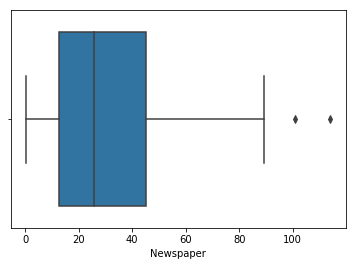

In [15]:
# Outlier Analysis

plot2 = sns.boxplot(advertising['Newspaper'])

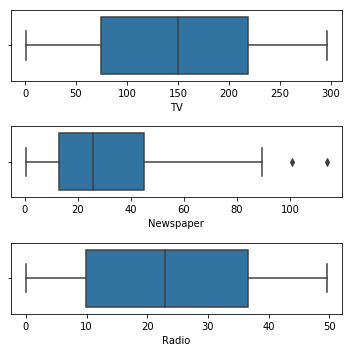

In [10]:
# Outlier Analysis
fig ,axs= plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()
#there are no considerable outliers in the data

Exploratory data analysis

Univariate analysis

In [ ]:
Sales (Target variable)

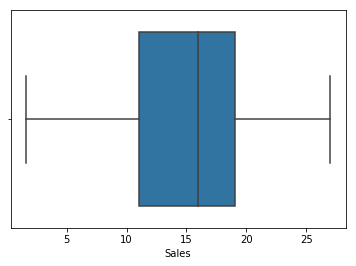

In [16]:
sns.boxplot(advertising['Sales'])
plt.show()

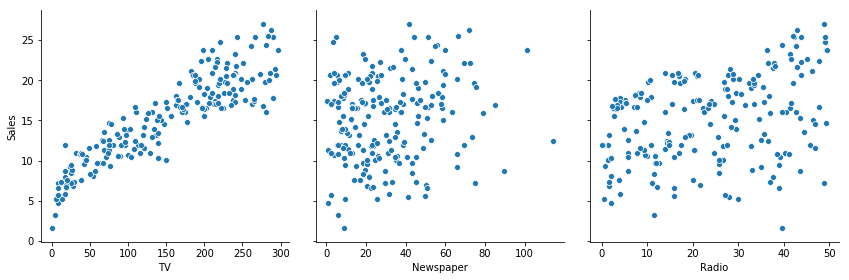

In [22]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1,kind='scatter')
plt.show()

In [4]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


So its clear that from the scatter plot and the correlation coeffiecients we can see sales has a strong relationship with TV so TV will be our feature variable

MODEL BUILDING

Equation of linear regression
y=c+m1x1+m2x2+...+mnxn 
y  is the response
c  is the intercept
m1  is the coefficient for the first feature
mn  is the coefficient for the nth feature

In our case:

y=c+m1×TV 
The  m  values are called the model coefficients or model parameters.

Generic Steps in model building using statsmodels
We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

Train-Test Split
WE  now need to split our variable into training and testing sets. We'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [6]:
X = advertising['TV']
y = advertising['Sales']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [8]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [9]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [4]:
# Add a constant to get an intercept
X_train_sm = sts.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sts.OLS(y_train, X_train_sm).fit()

NameError: name 'X_train' is not defined

In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())